In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Chargement du dataset
credit_card_data = pd.read_csv('/content/creditcard.csv')

**Exploration des données**

In [ ]:
print(credit_card_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(credit_card_data.tail())

        Time        V1        V2        V3        V4        V5        V6  \
15931  27369 -1.160116 -0.244177  0.744250 -0.192350  1.156356 -1.931383   
15932  27369 -3.058318  3.099206 -4.932555  1.924138 -1.576032 -2.135383   
15933  27369 -0.661806  0.315385  2.011194 -0.438757 -0.554990 -0.668072   
15934  27370  1.525348 -1.231442  0.420095 -1.551218 -1.376006  0.100758   
15935  27371  1.385680 -0.590076 -0.569197 -0.939441 -0.196015 -0.486685   

             V7        V8        V9  ...       V21       V22       V23  \
15931  0.409670 -0.364716 -0.516156  ... -0.021714  0.012447 -0.360625   
15932 -0.830098  2.228617 -0.312343  ... -0.111526 -0.485223 -0.003945   
15933  0.424651  0.079141  0.126057  ...  0.148063  0.177511  0.134794   
15934 -1.455755  0.134876 -1.319056  ... -0.108619  0.084883 -0.051758   
15935 -0.102496 -0.237930 -0.928028  ... -0.255944 -1.055682       NaN   

            V24       V25       V26       V27       V28  Amount  Class  
15931  0.514926  0.064194

In [ ]:
print(credit_card_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [ ]:
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
print(credit_card_data['Class'].value_counts())

Class
0.0    15862
1.0       73
Name: count, dtype: int64


**Suppression des lignes contenant des valeurs nulles**

---



In [ ]:
# Suppression des lignes contenant des valeurs NaN
credit_card_data.dropna(inplace=True)

In [ ]:
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Séparation des données pour l'analyse**

In [ ]:
legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]

**Statistiques descriptives**

In [ ]:
print(legit.shape)
print(fraud.shape)

(15862, 31)
(73, 31)


In [ ]:
print(legit['Amount'].describe())

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64


In [ ]:
print(fraud['Amount'].describe())

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [ ]:
print(credit_card_data.groupby('Class').mean())

               Time        V1       V2         V3        V4        V5  \
Class                                                                   
0.0    12104.432165 -0.219072  0.25000   0.862854  0.272641 -0.105868   
1.0    15559.643836 -7.929807  6.19312 -11.997831  6.555050 -5.474984   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.124522 -0.112681 -0.016178  0.879120  ...  0.028173 -0.064056   
1.0   -2.480356 -8.354317  3.668478 -3.086988  ...  0.671905  0.441100   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.161585 -0.035040  0.013076  0.117023  0.037111  0.011206  0.005907   
1.0   -0.295856 -0.358994 -0.328925  0.216076  0.209323  0.927187  0.061380   

          Amount  
Class             
0.0    66.280151  
1.0    90.307123  

[2 rows x 30 col

**EQUILIBRE LES CLASSES**

In [ ]:
# Suréchantillonnage avec SMOTE
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

smote = SMOTE(random_state=2)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [ ]:
# Affichage du nombre de classes avant et après équilibrage
print("Nombre de classe 0 avant équilibrage :", len(Y_train[Y_train == 0]))
print("Nombre de classe 1 avant équilibrage :", len(Y_train[Y_train == 1]))
print("Nombre de classe 0 après équilibrage avec SMOTE :", len(Y_train_balanced[Y_train_balanced == 0]))
print("Nombre de classe 1 après équilibrage avec SMOTE :", len(Y_train_balanced[Y_train_balanced == 1]))

Nombre de classe 0 avant équilibrage : 33259
Nombre de classe 1 avant équilibrage : 86
Nombre de classe 0 après équilibrage avec SMOTE : 33259
Nombre de classe 1 après équilibrage avec SMOTE : 33259


**APPLICATION DE LA REGRISSION LOGISTIQUE**

In [ ]:
# Instanciation et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_balanced, Y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Prédiction sur les données d'entraînement et de test
X_train_prediction = model.predict(X_train_balanced)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_balanced)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9880220646178093


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)


Accuracy score on Test Data :  0.989645434577973


**APPLICATION DE L'ARBRE DE DECISION**

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9987449011609665


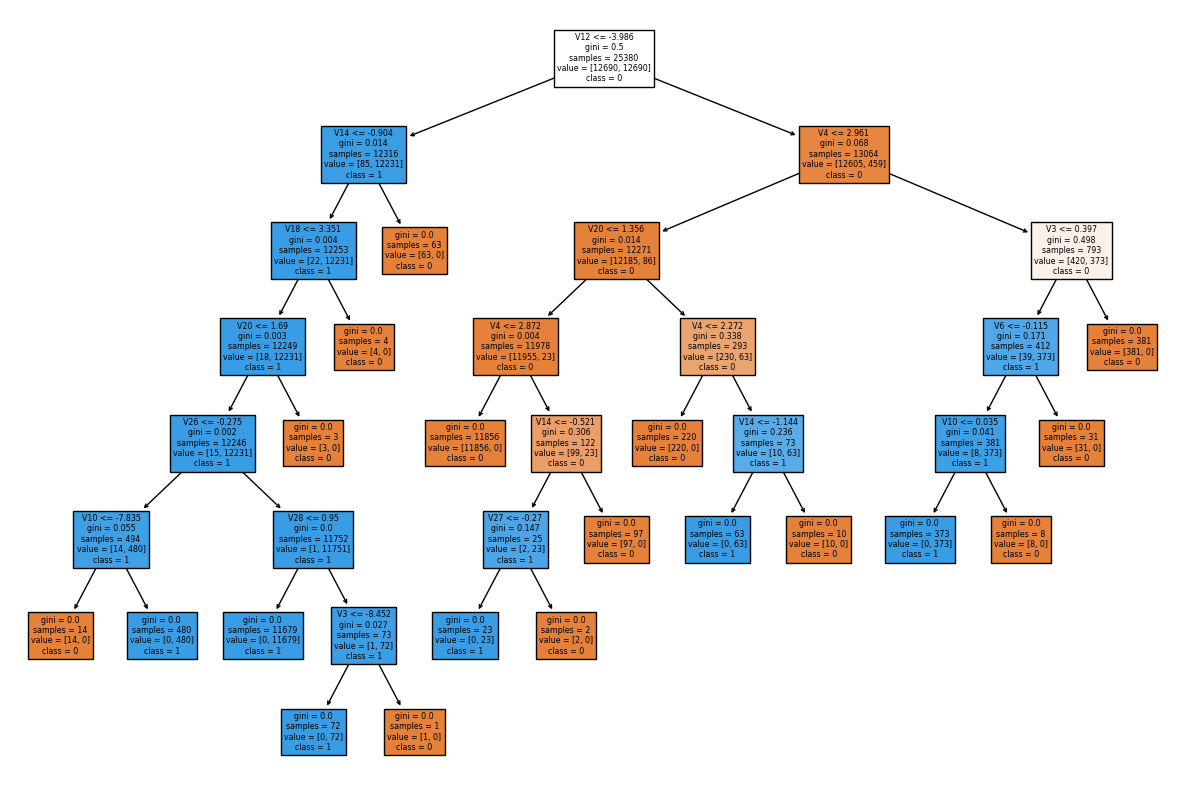

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Instanciation et entraînement du modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=2)
decision_tree_model.fit(X_train_balanced, Y_train_balanced)

# Prédiction sur les données d'entraînement et de test
X_train_prediction_dt = decision_tree_model.predict(X_train_balanced)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train_balanced)
print('Accuracy on Training data : ', training_data_accuracy_dt)

X_test_prediction_dt = decision_tree_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy_dt)

# Affichage de l'arbre de décision
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()


**APPLICATION DU KNN**

Meilleur k : 1
Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9802321932852213


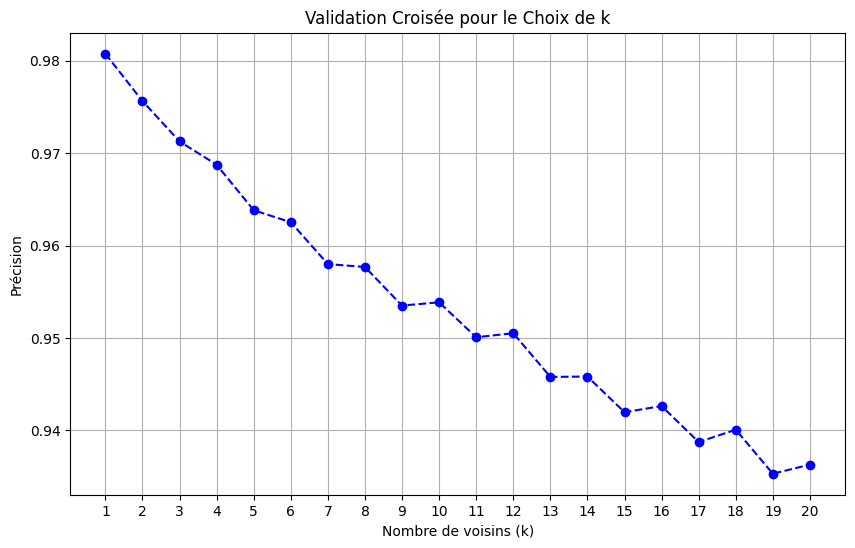

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Recherche du meilleur k avec validation croisée
k_values = list(range(1, 21))  # Tester les valeurs de k de 1 à 20
cv_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Trouver le meilleur k
best_k = k_values[cv_scores.index(max(cv_scores))]

print("Meilleur k :", best_k)

# Entraînement du modèle KNN avec le meilleur k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_balanced, Y_train_balanced)

# Prédiction sur les données d'entraînement et de test
X_train_prediction_knn = knn_model.predict(X_train_balanced)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train_balanced)
print('Accuracy on Training data : ', training_data_accuracy_knn)

X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy_knn)

# Affichage du modèle KNN
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('Validation Croisée pour le Choix de k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Précision')
plt.xticks(k_values)
plt.grid(True)
plt.show()
